In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("Classified Data")

In [8]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [10]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [19]:
df[:-1]

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
994,1.212650,0.839062,0.456012,0.773420,1.091210,0.794378,0.736621,1.162377,1.512756,1.415168,1
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1


In [21]:
scaled_ = scaler.fit_transform(df.drop("TARGET CLASS",axis=1))

In [27]:
scaled_.shape

(1000, 10)

In [33]:
scaled_df = pd.DataFrame(scaled_,columns=df.columns[:-1])

In [35]:
scaled_df.sample(5)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
729,0.381422,-0.035173,-0.036113,-0.174221,0.730521,1.394082,-0.080263,1.604327,-1.994077,0.517648
602,-1.340730,0.138888,0.256644,2.439353,-1.292270,2.036208,-1.431947,0.880941,-1.876355,-1.643259
615,-0.097116,-0.285698,-1.297663,-0.720490,-0.213858,-0.439564,1.035381,-1.647413,-0.118316,0.433649
52,0.425918,-0.114128,-1.043741,-1.220445,-0.063480,-0.872895,0.471586,-0.828564,1.219371,-0.946670
793,-1.441799,0.037141,2.197069,0.134951,-1.153835,0.472436,0.616284,-0.065601,0.763969,0.567492


In [36]:
from sklearn.model_selection import train_test_split

In [39]:
X = scaled_df
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(y_test != pred_i))

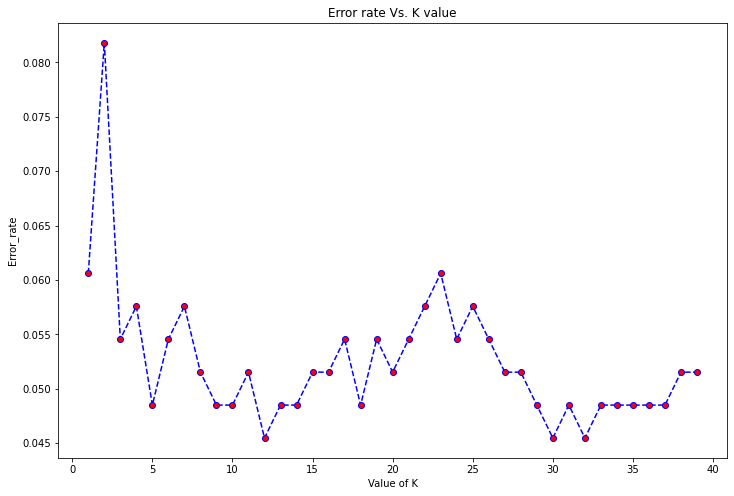

In [72]:
plt.figure(figsize=(12,8))
plt.plot(range(1,40), error_rate,'--or',color="blue",mfc='red')
plt.title("Error rate Vs. K value")
plt.xlabel("Value of K")
plt.ylabel("Error_rate");

In [81]:
error_rate.index(np.min(error_rate))+1

12

In [87]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix

In [88]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

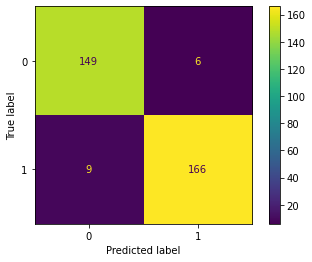

In [95]:
matrix = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
matrix.plot();

In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       155
           1       0.97      0.95      0.96       175

    accuracy                           0.95       330
   macro avg       0.95      0.95      0.95       330
weighted avg       0.95      0.95      0.95       330

